<a href="https://colab.research.google.com/github/ladhikari023/Self_driving_vehicle/blob/main/CNN_for_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from PIL import Image
import random
import requests

# for LeNet models - allows to create convolution and pooling
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
np.random.seed(0)




(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


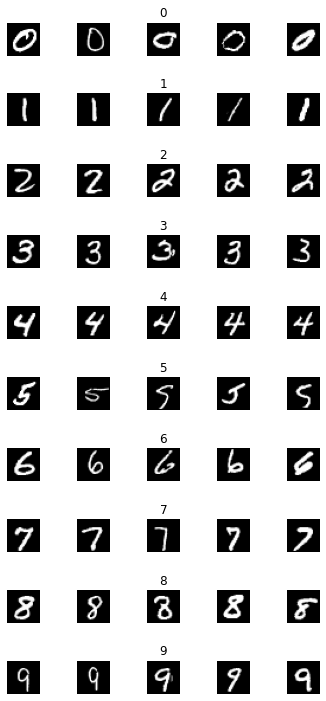

In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
 
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


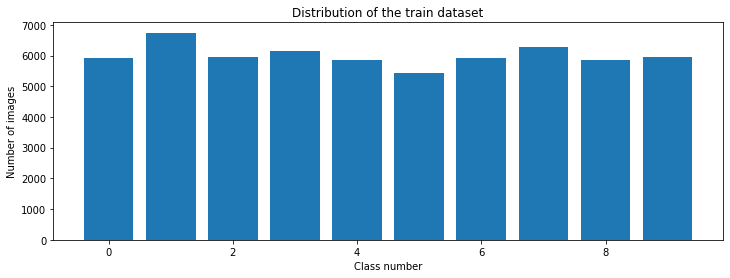

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Using LeNet architecture to classify MINST images
# Input - Conv1 - Pool1 - Conv2 - Pool2 - Full Connected layer - Output

In [ ]:
# define the leNet model function
def leNet_model():
  model = Sequential()
  # Conv2D parameters, no. of filters, filters size , shape of input data, activation function, 
  # strides decrease/increase kernel size, padding preserve border info of image 
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  # pooling size
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # Flatten the data 
  model.add(Flatten())
  # Data to be fed into fully connected layer
  model.add(Dense(500,activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

In [ ]:
history = model.fit(X_train,y_train, epochs = 10, validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Epoch 1/10
135/135 [==============================] - 15s 17ms/step - loss: 0.2034 - accuracy: 0.9343 - val_loss: 0.0680 - val_accuracy: 0.9802
Epoch 2/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0589 - val_accuracy: 0.9843
Epoch 3/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0435 - val_accuracy: 0.9878
Epoch 4/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0542 - val_accuracy: 0.9863
Epoch 5/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0329 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9848
Epoch 6/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0362 - val_accuracy: 0.9902
Epoch 7/10
135/135 [==============================] - 2s 14ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0431 - val_accuracy: 0.988

Text(0.5, 0, 'epoch')

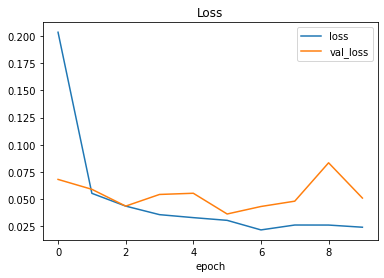

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

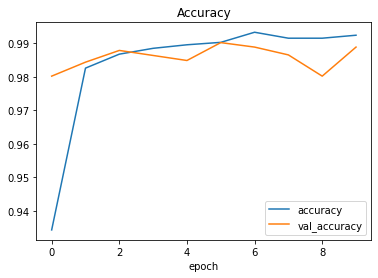

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

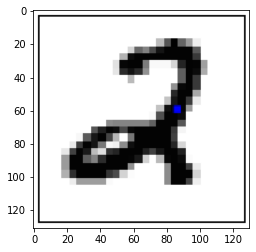

In [ ]:
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

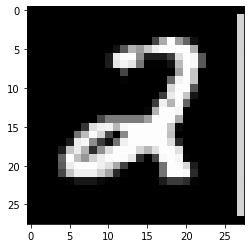

In [ ]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [ ]:
img = img/255
img = img.reshape(1, 28, 28 , 1)

In [ ]:
predict_x=model.predict(img) 
prediction=np.argmax(predict_x,axis=1)

print("predicted digit:", str(prediction))

predicted digit: [2]


In [ ]:
from keras.models import Model
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [ ]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)


In [ ]:
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


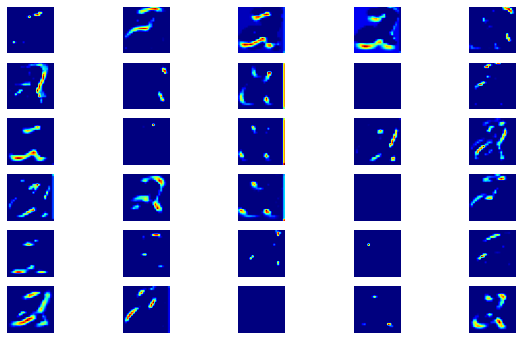

In [ ]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

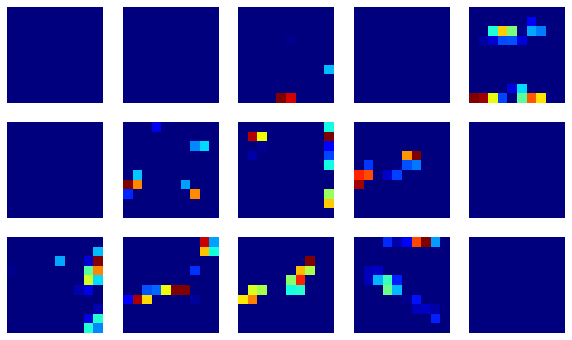

In [ ]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')